# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# !pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
# Create an environment
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
States have length: 37


# Implement Q-Network

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        '''
        Builds a feedforward nework with two hidden layers
        Initialize parameters
        
        Params
        =========
        state_size (int): Dimension of each state (input_size)
        action_size (int): dimension of each action (output_size)
        seed (int): Random seed(using 0)
        fc1_units (int): Size of the first hidden layer
        fc2_units (int): Size of the second hidden layer
        '''
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        # Add the first laer, input to hidden layer
        self.fc1 = nn.Linear(state_size, fc1_units)
        # Add more hidden layer
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        
    def forward(self, state):
        """
        Forward pass through the network. Build a network that mps state -> action values.
        """
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
        

# Experience Replay

In [9]:
import numpy as np
import random
from collections import namedtuple, deque

class ReplayBuffer:
    def __init__(self, action_size, buffer_size, batch_size, seed):
        '''
        Only stroes the last N experience tuples in the replay memory

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        '''
        # Initialize replay memory
        self.acion_size = action_size
        self.memory = deque(maxlen=buffer_size) # set N memory size
        self.batch_size = batch_size
        # build named experience tuples
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        
    def add(self, state, action, reward, next_state, done):
        '''
        we store the agent's experiences at each time-step, e_t = (s_t,a_t,r_t,s_(t+1))
        '''
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
        
    def sample(self):
        '''
        Samples uniformly at random from D(D_t = {e_1,...,e_t}) when  performing updates
        '''
        # D
        experiences = random.sample(self.memory, k=self.batch_size)
        #store in
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device) # gpu
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        # return D
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        '''
        Return the current size of internal memory
        '''
        return len(self.memory)
        

# Implement agent

In [10]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

# hyperparameters
LR = 5e-4                # learning rate
BUFFER_SIZE = int(1e5)   # replay buffer size N
BATCH_SIZE = 64          # minibatch size
UPDATE_EVERY = 4         # how often to update the network
GAMMA = 0.99             # Discount factor
TAU = 1e-3               # for soft update of target parameters


# Setup Gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Build Agent(): Evaluate our agent on unmodified games (dqn agent)
class Agent():
    """
    
    """
    def __init__(self, state_size, action_size, seed): #8, 4, 0
        """
        Initialize an Agent object.
        Params
        ======
            state_size (int): dimension of each state = 8
            action_size (int): dimension of each action = 4
            seed (int): random seed = 0
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        # Q-Network: Neural network function approx. with weights theta θ as a Q-Network.
        # A Q-Network can be trained by adjusting the parameters θ_i at iteration i to reduce the mse in the Bellman equation
        # The outputs correspond to the predicted Q-values of the individual action for input state
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device) # gpu
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        # specify optimizer(Adam)
        # optim.Adam(Qnet.parameters(), small learning rate)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR) ###
        
        # First, use a technique known as experience replay in which we stre the agent's experience at each time-step,
        # e_t= (s_t, a_t, r_t, s_(t_1)), in a data set D_t ={e_1,...,e_t},pooled over many episodes(where the end of an episode occurs when
        # a terminal state is reached) into a replay memory.
        #Initialize replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed) ###
        # Initialize time step (update every UPDATE_EVERY steps)
        self.t_step = 0
        
    def step(self, state, action, reward, next_state, done):
        # save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps
        self.t_step =(self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # if enough samples are availabe in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE: ###
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA) ###
                
    def act(self, state, eps=0):
        '''
        Choose action A from state S using policy pi <- epsilon-Greedt(q^hat (S,A,w))
        Return actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection        
        '''
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()
        
        # It is off-policy: it learns about the greedy policy a = argmax Q(s,a';θ),
        # while following a behaviour distribution is often selected by an eps-greedy policy
        # that follows the greey policy with probability 1-eps and selects a random action
        # with probability eps.        
        # Epsilon-greedy action selection
        # 
        # with probability epsilon select a random action a_t
        # otherwise select a_t = argmax_a Q (phi(s_t),a; θ)
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))
        
    def learn(self, experiences, gamma): #----only use the local and target Q-networks to compute the loss before taking a step towards minimizing the loss
        '''
        Update value parameters using given batch of experience tuples
        
        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor
        
        '''
        states, actions, rewards, next_states, dones = experiences
        
        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        
        # Compute Q targets for current states
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        
        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)
        
        ###############
        # apply loss fucntion
        # calculate the loss
        loss = F.mse_loss(Q_expected, Q_targets)
        
        # zero the parameter (weight) gradients
        self.optimizer.zero_grad()
        
        # backward pass to calculate the parameter gradients
        loss.backward()
        
        # update the parameters
        self.optimizer.step()
        
        #################
        #Update target network
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU) ###
        
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)
        
        
        
        
        

# Begin Train


In [11]:
agent = Agent(state_size=37, action_size=4, seed=0)

Episode 100	 Average Score:0.922
Episode 200	 Average Score:4.055
Episode 300	 Average Score:7.833
Episode 400	 Average Score:11.233
Episode 500	 Average Score:13.188
Episode 600	 Average Score:13.355
Episode 630	 Average Score: 14.02
Environment solved in 530 episodes!	Average Score: 14.02


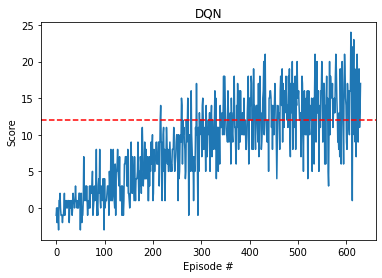

<Figure size 432x288 with 0 Axes>

In [12]:
from collections import deque
import numpy as np
import torch

def dqn(n_episodes = 2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    Train the Agent with Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # Initialize collecting scores from each episode
    scores = []
    # Initialize collecting maxlen(100) scores
    scores_window = deque(maxlen=100)
    # initialize starting value of epsilon
    eps = eps_start
    
    # for each episode----------------
    for i_episode in range(1, n_episodes+1):
        # begin the episode
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]  
        
        # initialize the sampled score(reward)
        score = 0
        
        # Set constrain maximum number of time step per episode
        for t in range(max_t):
            # agent select an action
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            
            # agent performs the selected action
            #next_state, reward, done, _ = env.step(action)
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
    
            # agent performs internal updates based on sampled experience
            agent.step(state, action, reward, next_state, done)
            # update the sampled reward
            score += reward
            # update the state (s <- s') to next time step
            state = next_state
            if done:
                break
        #Save most recent score
        scores_window.append(score)
        #save most recent score
        scores.append(score)
        #Decrease epsilon
        eps = max(eps_end, eps_decay*eps)
        
        # monitor progress
        print('\rEpisode {}\t Average Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        # get average reward from last 100 episodes
        if i_episode % 100 == 0:
            print('\rEpisode {}\t Average Score:{:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=14.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100,
                                                                                         np.mean(scores_window)))
            # save model
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(scores, sigma=12)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN Data')
plt.plot(np.arange(len(scores)), ysmoothed, label='Filtered Data')
plt.title("DQN")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.axhline(y=13, color='r', linestyle='--', label='Avg. Score = 13')
plt.legend(loc='best')
plt.savefig('DQN.png')
plt.savefig('DQN.pdf')
plt.show()

In [13]:
env.close()

In [14]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

# model = load_model_checkpoint('checkpoint.pth')
# agent.qnetwork_local = model
# print(model)

<All keys matched successfully>

In [15]:
import time
time.sleep(5)
env_info = env.reset(train_mode=False)[brain_name] # reset the environment

state = env_info.vector_observations[0]            # get the current state

score = 0                                          # initialize the score
while True:
    action = np.int16(agent.act(state)).item()  # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    time.sleep(0.05)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

UnityEnvironmentException: No Unity environment is loaded.

In [ ]:
env.close()

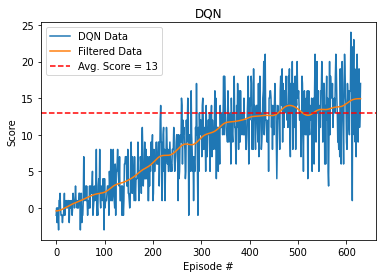

In [32]:
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(scores, sigma=12)


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN Data')
plt.plot(np.arange(len(scores)), ysmoothed, label='Filtered Data')
plt.title("DQN")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.axhline(y=13, color='r', linestyle='--', label='Avg. Score = 13')
plt.legend(loc='best')
plt.savefig('DQN.png')
plt.savefig('DQN.pdf')
plt.show()


In [34]:
print("Environment solved in 530 episodes!	Average Score: 14.02")

Environment solved in 530 episodes!	Average Score: 14.02


In [53]:
import scipy.interpolate
x_interp = scipy.interpolate.interp1d(ysmoothed, np.arange(len(scores)))

#find y-value associated with x-value of 13 
print(x_interp(13))

511.70498896406673
